# “A Multi-Objective Analysis of Spiking Neuron Models for Neuromorphic AI”

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters (same for all models)
T = 200.0             # total time (ms)
dt = 0.01          # time step (ms)
t = np.arange(0, T, dt)


# Input current parameters
I_const = 50.0     # constant input
I_amp = 5.0        # sinusoidal amplitude
freq = 10.0        # Hz
noise_std = 1.0    # noise strength


In [2]:
def constant_current(I):
    return I * np.ones_like(t)


In [3]:
def sinusoidal_current(I0, A, f):
    return I0 + A * np.sin(2 * np.pi * f * t / 1000)


In [4]:
def noisy_current(I0, noise_std):
    noise = np.random.normal(0, noise_std, size=len(t))
    return I0 + noise


In [5]:
# Choose input type
I_input = constant_current(I_const)
# I_input = sinusoidal_current(I_const, I_amp, freq)
# I_input = noisy_current(I_const, noise_std)


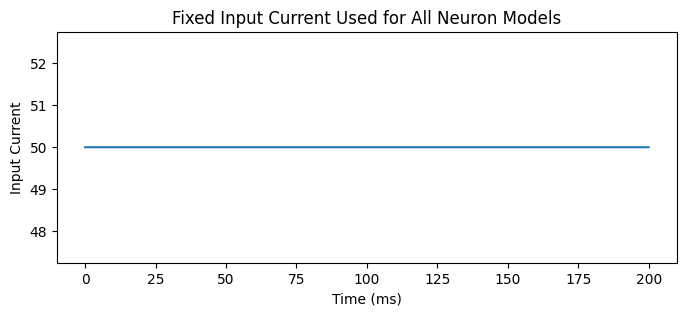

In [6]:
plt.figure(figsize=(8, 3))
plt.plot(t, I_input)
plt.xlabel("Time (ms)")
plt.ylabel("Input Current")
plt.title("Fixed Input Current Used for All Neuron Models")
plt.show()


## Leaky Integrate-and-Fire (LIF) Neuron Model

Neuron models where action potentials are described as events are called “integrate-and-ﬁre” models

we introduce the simplest model in the class of integrate-and-ﬁre models using the following two ingredients: (i) a linear differential equation to describe the evolution of the membrane potential; (ii) a threshold for spike ﬁring. This model is called the “leaky integrate-and-ﬁre"


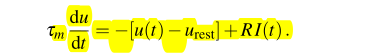

In [7]:
# LIF parameters
V_rest = -65.0      # resting potential (mV)
V_reset = -65.0     # reset potential (mV)
V_th = -30.0        # spike threshold (mV)
tau_m = 20.0        # membrane time constant (ms)
R = 1.0             # membrane resistance


In [8]:
def lif_neuron(I_input):
    V = np.zeros(len(t))
    V[0] = V_rest
    spikes = []

    for i in range(1, len(t)):
        dV = (-(V[i-1] - V_rest) + R * I_input[i-1]) / tau_m
        V[i] = V[i-1] + dt * dV

        if V[i] >= V_th:
            V[i] = V_reset
            spikes.append(t[i])
        
    return V, np.array(spikes)

In [9]:
V_lif, spikes_lif = lif_neuron(I_input)


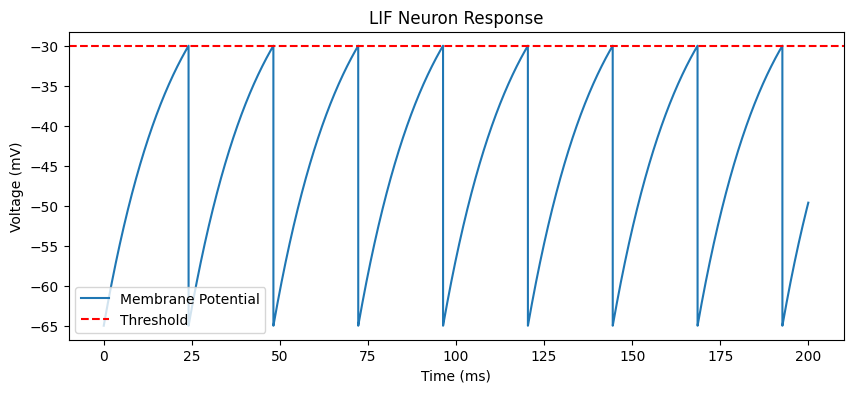

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(t, V_lif, label="Membrane Potential")
plt.axhline(V_th, color='r', linestyle='--', label="Threshold")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("LIF Neuron Response")
plt.legend()
plt.show()


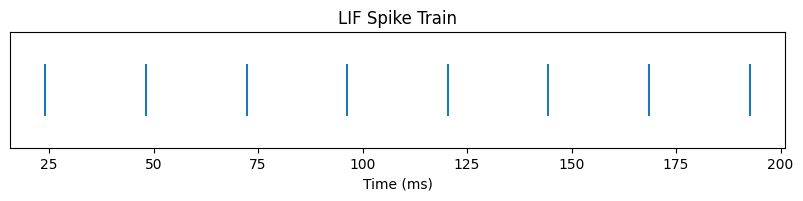

In [11]:
plt.figure(figsize=(10, 1.5))
plt.eventplot(spikes_lif, lineoffsets=1, linelengths=0.8)
plt.xlabel("Time (ms)")
plt.title("LIF Spike Train")
plt.yticks([])
plt.show()


### What can we expect from integrate-and-ﬁre models

The leaky integrate-and-ﬁre model is an extremely simpliﬁed neuron model. It neglects many features that neuroscientists have observed when they study neurons in the living brain or in slices of brain tissue. Therefore the question arises: what should we expect from such a model? Clearly we cannot expect it to explain the complete biochemistry and biophysics of neurons. Nor do we expect it to account for highly nonlinear interactions that are caused by active currents in some “hot spots” on the dendritic tree. However, the integrate-and-ﬁre model is surprisingly accu- rate when it comes to generating spikes, i.e., precisely timed events in time. Thus, it could potentially be a valid model of spike generation in neurons, or more precisely, in the soma.

## Izhikevich Neuron Model

### Izhikevich 

A model is presented that reproduces spiking and bursting behavior of known types of cortical neurons. The model combines the biologically plausibility of Hodgkin–Huxley-type dynamics and the computational efficiency of integrate-and-fire neurons. Using this model, one can simulate tens of thousands of spiking cortical neurons in real time (1 ms resolution) using a desktop PC.

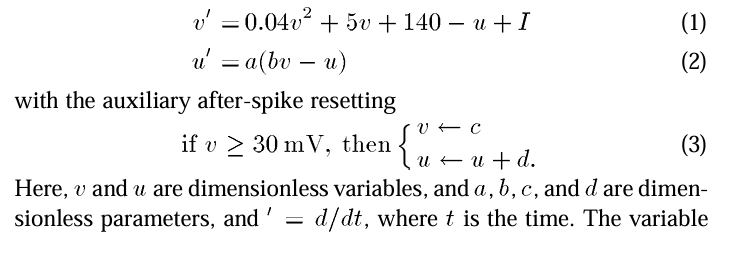

In [12]:
# Izhikevich parameters (Regular Spiking)
a = 0.02
b = 0.2
c = -65.0
d = 8.0


In [13]:
def izhikevich_neuron(I_input):
    v = np.zeros(len(t))
    u = np.zeros(len(t))
    v[0] = -65.0
    u[0] = b * v[0]
    spikes = []

    for i in range(1, len(t)):
        dv = 0.04 * v[i-1]**2 + 5 * v[i-1] + 140 - u[i-1] + I_input[i-1]
        du = a * (b * v[i-1] - u[i-1])

        v[i] = v[i-1] + dt * dv
        u[i] = u[i-1] + dt * du

        if v[i] >= 30:
            v[i-1] = 30
            v[i] = c
            u[i] += d
            spikes.append(t[i])

    return v, u, np.array(spikes)


In [14]:
v_izh, u_izh, spikes_izh = izhikevich_neuron(I_input)


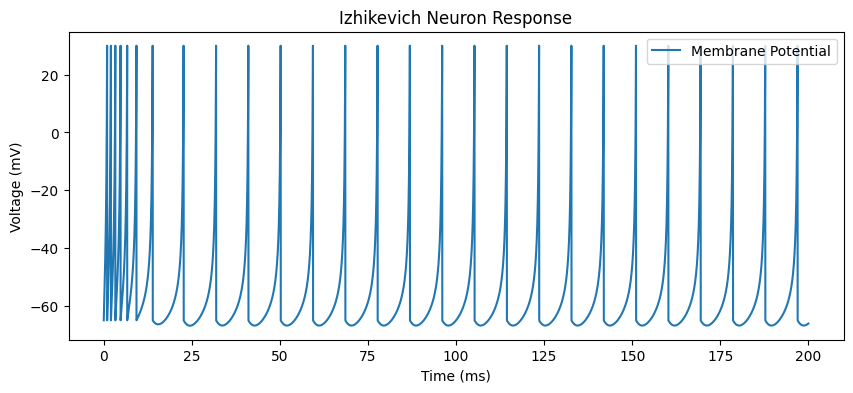

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(t, v_izh, label="Membrane Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Izhikevich Neuron Response")
plt.legend()
plt.show()


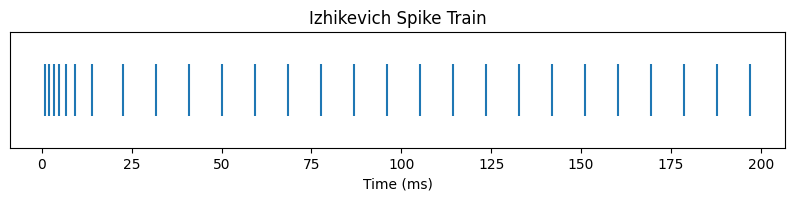

In [16]:
plt.figure(figsize=(10, 1.5))
plt.eventplot(spikes_izh, lineoffsets=1, linelengths=0.8)
plt.xlabel("Time (ms)")
plt.title("Izhikevich Spike Train")
plt.yticks([])
plt.show()


## Hodgkin–Huxley Neuron

### Hodgkin–Huxley model

Hodgkin and Huxley (1952) performed experiments on the giant axon of the squid and found three different types of ion current, namely, sodium, potassium, and a leak current that consists mainly of Cl− ions. Speciﬁc voltage-dependent ion channels, one for sodium and another one for potassium, control the ﬂow of those ions through the cell membrane. The leak current takes care of other channel types which are not described explicitly

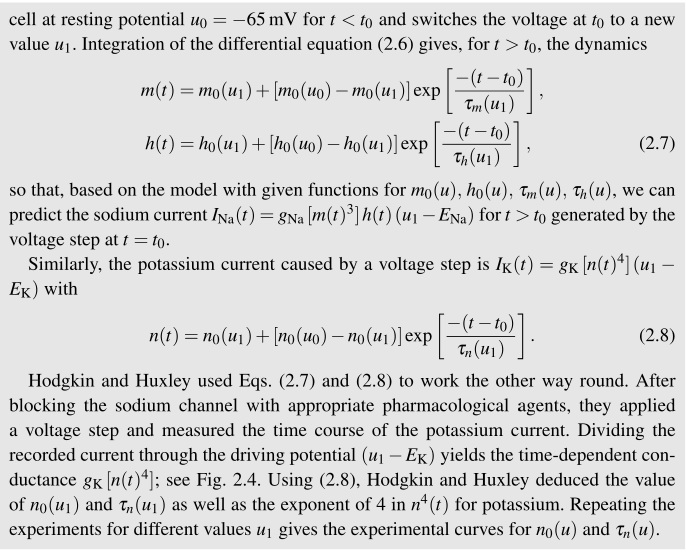

In [17]:
# Hodgkin-Huxley parameters
C_m = 1.0      # membrane capacitance (uF/cm^2)

g_Na = 120.0   # sodium conductance
g_K = 36.0     # potassium conductance
g_L = 0.3      # leak conductance

E_Na = 50.0    # sodium reversal (mV)
E_K = -77.0    # potassium reversal (mV)
E_L = -54.4    # leak reversal (mV)


In [18]:
def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)


In [19]:
def hodgkin_huxley_neuron(I_input):
    V = np.zeros(len(t))
    m = np.zeros(len(t))
    h = np.zeros(len(t))
    n = np.zeros(len(t))

    V[0] = -65.0
    m[0] = alpha_m(V[0]) / (alpha_m(V[0]) + beta_m(V[0]))
    h[0] = alpha_h(V[0]) / (alpha_h(V[0]) + beta_h(V[0]))
    n[0] = alpha_n(V[0]) / (alpha_n(V[0]) + beta_n(V[0]))

    spikes = []

    for i in range(1, len(t)):
        I_Na = g_Na * m[i-1]**3 * h[i-1] * (V[i-1] - E_Na)
        I_K  = g_K * n[i-1]**4 * (V[i-1] - E_K)
        I_L  = g_L * (V[i-1] - E_L)

        dV = (I_input[i-1] - I_Na - I_K - I_L) / C_m
        V[i] = V[i-1] + dt * dV

        m[i] = m[i-1] + dt * (alpha_m(V[i-1])*(1-m[i-1]) - beta_m(V[i-1])*m[i-1])
        h[i] = h[i-1] + dt * (alpha_h(V[i-1])*(1-h[i-1]) - beta_h(V[i-1])*h[i-1])
        n[i] = n[i-1] + dt * (alpha_n(V[i-1])*(1-n[i-1]) - beta_n(V[i-1])*n[i-1])

        if V[i] > 0 and V[i-1] <= 0:
            spikes.append(t[i])

    return V, m, h, n, np.array(spikes)


In [20]:
V_hh, m_hh, h_hh, n_hh, spikes_hh = hodgkin_huxley_neuron(I_input)


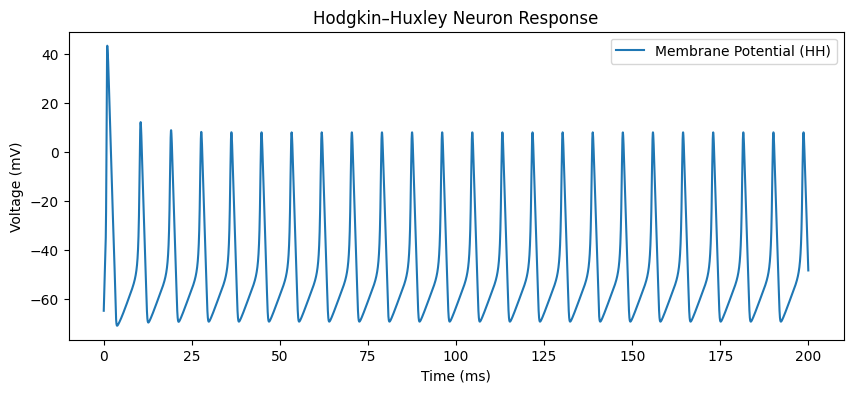

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(t, V_hh, label="Membrane Potential (HH)")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Hodgkin–Huxley Neuron Response")
plt.legend()
plt.show()


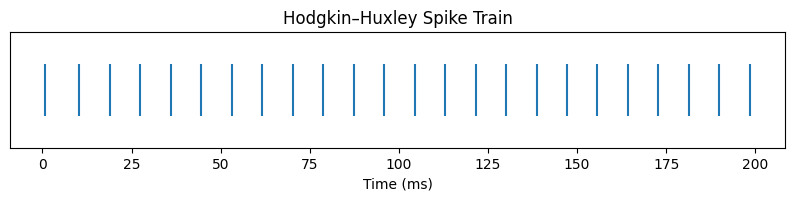

In [22]:
plt.figure(figsize=(10, 1.5))
plt.eventplot(spikes_hh, lineoffsets=1, linelengths=0.8)
plt.xlabel("Time (ms)")
plt.title("Hodgkin–Huxley Spike Train")
plt.yticks([])
plt.show()


### Spike Fidelity & Computational Cost Metrics

In [23]:
spikes_lif
spikes_izh
spikes_hh


array([  0.77,  10.25,  18.92,  27.49,  36.04,  44.59,  53.14,  61.68,
        70.23,  78.78,  87.32,  95.87, 104.42, 112.97, 121.51, 130.06,
       138.61, 147.15, 155.7 , 164.25, 172.8 , 181.34, 189.89, 198.44])

In [24]:
def firing_rate(spikes, T):
    return len(spikes) / (T / 1000)  # Hz


In [25]:
fr_lif = firing_rate(spikes_lif, T)
fr_izh = firing_rate(spikes_izh, T)
fr_hh  = firing_rate(spikes_hh, T)


In [26]:
fr_error_lif = abs(fr_lif - fr_hh)
fr_error_izh = abs(fr_izh - fr_hh)


In [27]:
def spike_timing_error(ref_spikes, test_spikes):
    n = min(len(ref_spikes), len(test_spikes))
    if n == 0:
        return np.inf
    return np.mean(np.abs(ref_spikes[:n] - test_spikes[:n]))


In [28]:
timing_err_lif = spike_timing_error(spikes_hh, spikes_lif)
timing_err_izh = spike_timing_error(spikes_hh, spikes_izh)


In [29]:
def isi_variance(spikes):
    if len(spikes) < 2:
        return np.inf
    isi = np.diff(spikes)
    return np.var(isi)


In [30]:
isi_lif = isi_variance(spikes_lif)
isi_izh = isi_variance(spikes_izh)
isi_hh  = isi_variance(spikes_hh)


### Runtime Cost

In [31]:
import time as time_module

def runtime_cost(func, I_input, runs=5):
    times = []
    for _ in range(runs):
        start = time_module.time()
        func(I_input)
        times.append(time_module.time() - start)
    return np.mean(times)



In [32]:
time_lif = runtime_cost(lif_neuron, I_input)
time_izh = runtime_cost(izhikevich_neuron, I_input)
time_hh  = runtime_cost(hodgkin_huxley_neuron, I_input)


In [33]:
state_vars = {
    "LIF": 1,
    "Izhikevich": 2,
    "Hodgkin-Huxley": 4
}


In [34]:
models = ["LIF", "Izhikevich", "Hodgkin-Huxley"]

firing_rate_error = np.array([
    fr_error_lif,
    fr_error_izh,
    0.0              # HH reference
])

timing_error = np.array([
    timing_err_lif,
    timing_err_izh,
    0.0
])

runtime = np.array([
    time_lif,
    time_izh,
    time_hh
])


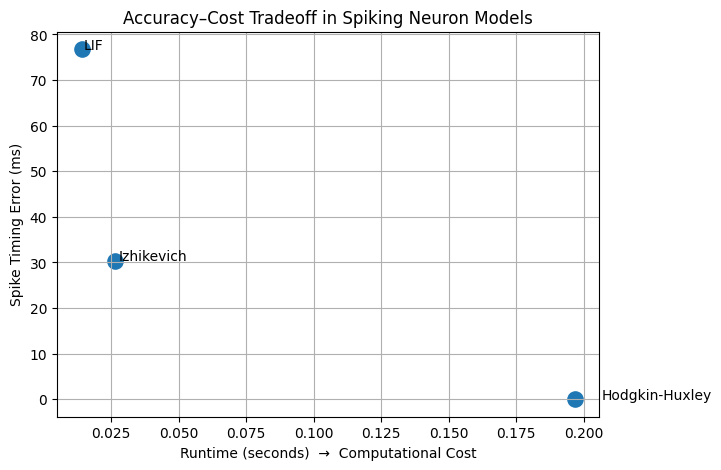

In [35]:
plt.figure(figsize=(7, 5))
plt.scatter(runtime, timing_error, s=120)

for i, model in enumerate(models):
    plt.text(runtime[i]*1.05, timing_error[i], model)

plt.xlabel("Runtime (seconds)  →  Computational Cost")
plt.ylabel("Spike Timing Error (ms)")
plt.title("Accuracy–Cost Tradeoff in Spiking Neuron Models")
plt.grid(True)
plt.show()



# Interpretation:

### Leaky Integrate-and-Fire (LIF)

Very low runtime (~0.015 s) → extremely cheap computationally

High spike timing error (~75 ms) → poor temporal fidelity

LIF is ideal for large-scale neuromorphic deployment where energy and speed matter more than biological realism. However, it sacrifices precise spike timing.

#### Good for:

Event-based sensing

Edge neuromorphic hardware

Large SNNs where efficiency dominates



### Izhikevich Model

Moderate runtime (~0.03 s)

Moderate spike error (~30 ms)


This model lies in the Pareto middle ground, offering a strong balance between:

computational efficiency

biological plausibility

It captures diverse firing patterns at a fraction of HH’s cost.

#### Good for:

Brain-inspired AI

Neuromorphic algorithms needing richer dynamics

Research prototypes balancing realism and scalability



### Hodgkin–Huxley (HH)

High runtime (~0.18 s) → computationally expensive

Near-zero spike timing error → highest fidelity

HH is the gold standard for biophysical accuracy, faithfully modeling ionic channel dynamics—but at a steep computational cost.

#### Good for:

Computational neuroscience

Mechanistic studies of neural dynamics

Not scalable for real-time neuromorphic systems

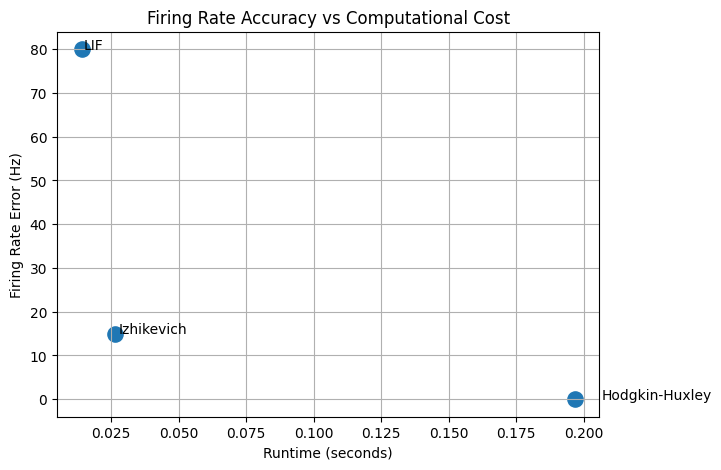

In [36]:
plt.figure(figsize=(7, 5))
plt.scatter(runtime, firing_rate_error, s=120)

for i, model in enumerate(models):
    plt.text(runtime[i]*1.05, firing_rate_error[i], model)

plt.xlabel("Runtime (seconds)")
plt.ylabel("Firing Rate Error (Hz)")
plt.title("Firing Rate Accuracy vs Computational Cost")
plt.grid(True)
plt.show()


| Model          | Spike Timing | Firing Rate | Cost      |
| -------------- | ------------ | ----------- | --------- |
| LIF            | Poor         | Poor        | Excellent |
| Izhikevich     | Moderate     | Moderate    | Good      |
| Hodgkin–Huxley | Excellent    | Excellent   | Poor      |


## Multi-Metric Comparison of Neuron Models

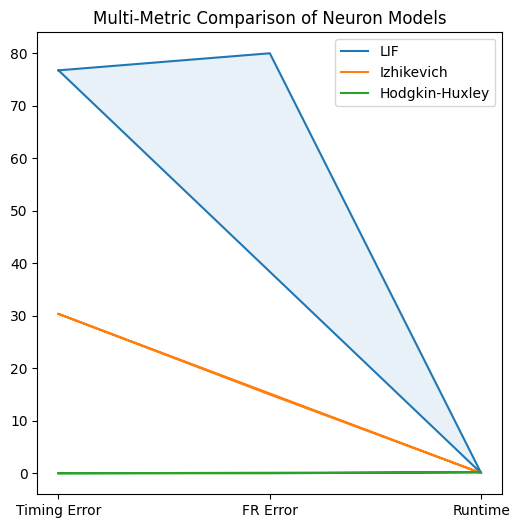

In [37]:
from math import pi

labels = ["Timing Error", "FR Error", "Runtime"]
lif_vals = [timing_err_lif, fr_error_lif, time_lif]
izh_vals = [timing_err_izh, fr_error_izh, time_izh]
hh_vals  = [0, 0, time_hh]

angles = np.linspace(0, 2*pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

def radar_plot(values, label):
    values = values + [values[0]]
    plt.plot(angles, values, label=label)
    plt.fill(angles, values, alpha=0.1)

plt.figure(figsize=(6, 6))
radar_plot(lif_vals, "LIF")
radar_plot(izh_vals, "Izhikevich")
radar_plot(hh_vals, "Hodgkin-Huxley")

plt.xticks(angles[:-1], labels)
plt.title("Multi-Metric Comparison of Neuron Models")
plt.legend(loc="upper right")
plt.show()


“Figure presents a multi-metric comparison of spiking neuron models across spike timing accuracy, firing-rate fidelity, and computational cost. The results highlight a clear tradeoff between biological realism and efficiency. While the Hodgkin–Huxley model achieves near-zero error across temporal and rate-based metrics, it incurs the highest computational cost. Conversely, the LIF model offers maximal efficiency at the expense of accuracy. The Izhikevich model emerges as a balanced alternative, achieving substantial improvements in neural fidelity while maintaining computational feasibility, making it particularly suitable for neuromorphic AI applications.”